In [1]:
%matplotlib inline

In [2]:
#!sourmash compare sigs/*.sig -o all-k21 

In [16]:
import sourmash_lib.fig
import os

In [4]:
mat, labels = sourmash_lib.fig.load_matrix_and_labels('all-k21')

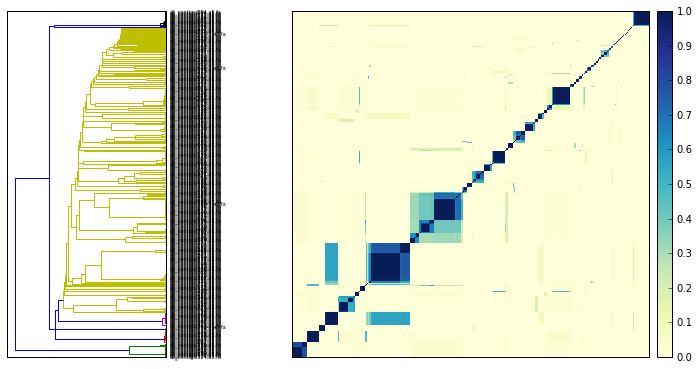

In [31]:
_ = sourmash_lib.fig.plot_composite_matrix(mat, labels)

In [6]:
import pylab
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import palettable as pal
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
import collections

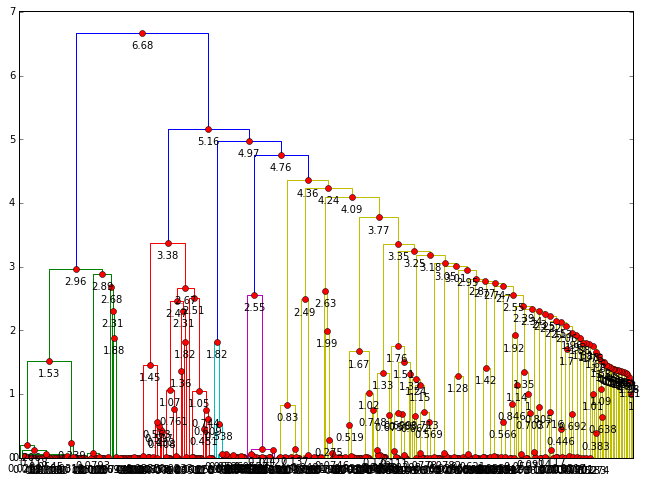

In [7]:
# this is what makes the distances
Y = sch.linkage(mat, method='average')

fig = pylab.figure(figsize=(11, 8))


def augmented_dendrogram(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        for i, d in zip(ddata['icoord'], ddata['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -8),
                         textcoords='offset points',
                         va='top', ha='center')

    return ddata

Z = augmented_dendrogram(Y, orientation='top', no_labels=True, labels=labels)


cluster 1 is 31 in size
cluster 2 is 11 in size
cluster 3 is 14 in size
cluster 4 is 2 in size
cluster 5 is 1 in size
cluster 6 is 1 in size
cluster 7 is 1 in size
cluster 8 is 23 in size
cluster 9 is 6 in size
cluster 10 is 5 in size
cluster 11 is 5 in size
cluster 12 is 1 in size
cluster 13 is 1 in size
cluster 14 is 2 in size
cluster 15 is 1 in size
cluster 16 is 8 in size
cluster 17 is 7 in size
cluster 18 is 1 in size
cluster 19 is 19 in size
cluster 20 is 1 in size
cluster 21 is 17 in size
cluster 22 is 1 in size
cluster 23 is 16 in size
cluster 24 is 13 in size
cluster 25 is 1 in size
cluster 26 is 13 in size
cluster 27 is 1 in size
cluster 28 is 1 in size
cluster 29 is 10 in size
cluster 30 is 5 in size
cluster 31 is 2 in size
cluster 32 is 8 in size
cluster 33 is 2 in size
cluster 34 is 10 in size
cluster 35 is 1 in size
cluster 36 is 1 in size
cluster 37 is 1 in size
cluster 38 is 3 in size
cluster 39 is 9 in size
cluster 40 is 1 in size
cluster 41 is 6 in size
cluster 42 is 

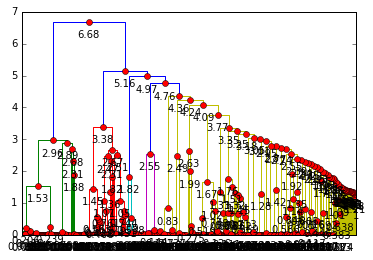

In [61]:
CUT_POINT=1

# redo load/clustering just for grins.
mat, labels = sourmash_lib.fig.load_matrix_and_labels('all-k21')

Y = sch.linkage(mat, method='average')
cluster_ids = sch.fcluster(Y, t=CUT_POINT, criterion='distance')

Z = augmented_dendrogram(Y, orientation='top', no_labels=True, labels=labels)

# now, get leaves and leaf labels
idx1 = Z['leaves']
new_labels = Z['ivl']

# build clusters => sets of hashes.        
clusters = collections.defaultdict(set)

for i, k in enumerate(idx1):
    cluster_id = cluster_ids[k]
    clusters[cluster_id].add(new_labels[i])

for i in clusters:
    print('cluster {} is {} in size'.format(i, len(clusters[i])))

In [62]:
len(clusters)

94

In [63]:

def filename_to_sigfile(filename):
    genome_num = filename.split('/')[1].split('.')[0]    
    sigfile = os.path.join('sigs', '{}-k21.sig'.format(genome_num))
    return sigfile

    
cluster_sigfiles = {}
for cluster_id in clusters:
    sigfiles = set()
    for filename in clusters[cluster_id]:
        sigfiles.add(filename_to_sigfile(filename))
    
    cluster_sigfiles[cluster_id] = sigfiles


In [64]:
!rm -fr unique
!mkdir unique

In [65]:
import random

reps = []
for cluster_id in cluster_sigfiles:
    rep = random.choice(list(cluster_sigfiles[cluster_id]))
    print('choosing {} to represent cluster {}'.format(rep, cluster_id))
    reps.append(rep)
    
replist = " ".join(reps)    
!cp $replist unique/


choosing sigs/074-k21.sig to represent cluster 1
choosing sigs/223-k21.sig to represent cluster 2
choosing sigs/327-k21.sig to represent cluster 3
choosing sigs/348-k21.sig to represent cluster 4
choosing sigs/372-k21.sig to represent cluster 5
choosing sigs/138-k21.sig to represent cluster 6
choosing sigs/143-k21.sig to represent cluster 7
choosing sigs/104-k21.sig to represent cluster 8
choosing sigs/283-k21.sig to represent cluster 9
choosing sigs/031-k21.sig to represent cluster 10
choosing sigs/281-k21.sig to represent cluster 11
choosing sigs/155-k21.sig to represent cluster 12
choosing sigs/354-k21.sig to represent cluster 13
choosing sigs/149-k21.sig to represent cluster 14
choosing sigs/405-k21.sig to represent cluster 15
choosing sigs/390-k21.sig to represent cluster 16
choosing sigs/294-k21.sig to represent cluster 17
choosing sigs/173-k21.sig to represent cluster 18
choosing sigs/229-k21.sig to represent cluster 19
choosing sigs/083-k21.sig to represent cluster 20
choosing 

In [66]:
!sourmash compare unique/*.sig -o unique.cmp -k 21

loading unique/002-k21.sig
loading unique/004-k21.sig
loading unique/007-k21.sig
loading unique/009-k21.sig
loading unique/018-k21.sig
loading unique/022-k21.sig
loading unique/028-1-k21.sig
loading unique/028-2-k21.sig
loading unique/031-k21.sig
loading unique/032-k21.sig
loading unique/052-k21.sig
loading unique/064-k21.sig
loading unique/065-k21.sig
loading unique/072-k21.sig
loading unique/074-k21.sig
loading unique/083-k21.sig
loading unique/090-k21.sig
loading unique/091-k21.sig
loading unique/092-k21.sig
loading unique/095-k21.sig
loading unique/096-k21.sig
loading unique/099-k21.sig
loading unique/103-k21.sig
loading unique/104-k21.sig
loading unique/117-k21.sig
loading unique/120-k21.sig
loading unique/128-k21.sig
loading unique/133-k21.sig
loading unique/138-k21.sig
loading unique/142-k21.sig
loading unique/143-k21.sig
loading unique/145-k21.sig
loading unique/149-k21.sig
loading unique/155-k21.sig
loading unique/157-k21.sig
loading unique/161-k21.sig
loading unique/163-k21.s

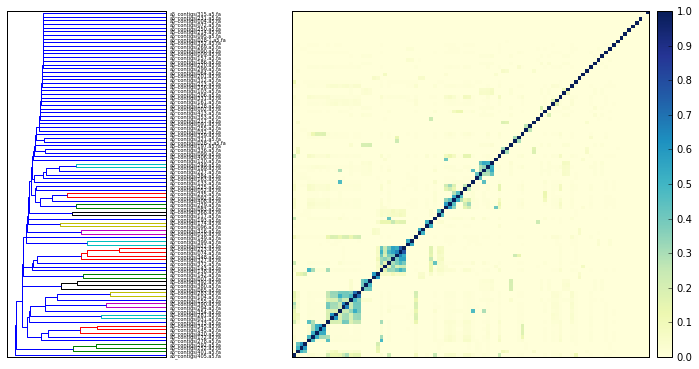

In [67]:
unique_mat, unique_labels = sourmash_lib.fig.load_matrix_and_labels('unique.cmp')
_ = sourmash_lib.fig.plot_composite_matrix(unique_mat, unique_labels)